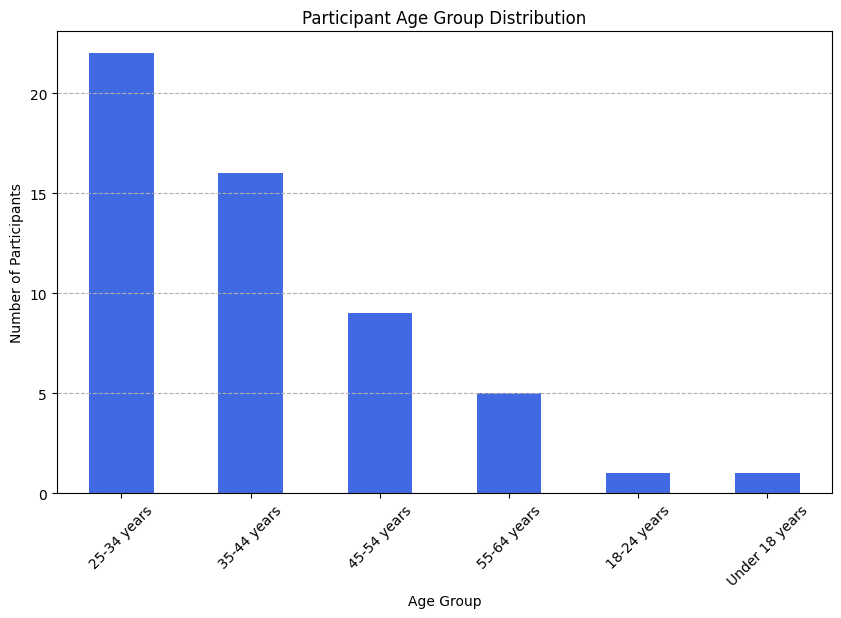

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('Knowit communication survey 2(Sheet1).csv', encoding='ISO-8859-1')

# Analyze the "What is your age group?" column for counts
age_group_counts = df['What is your age group?'].value_counts()

# Plotting the age group analysis
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='royalblue')
plt.title('Participant Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Show the plot
plt.show()


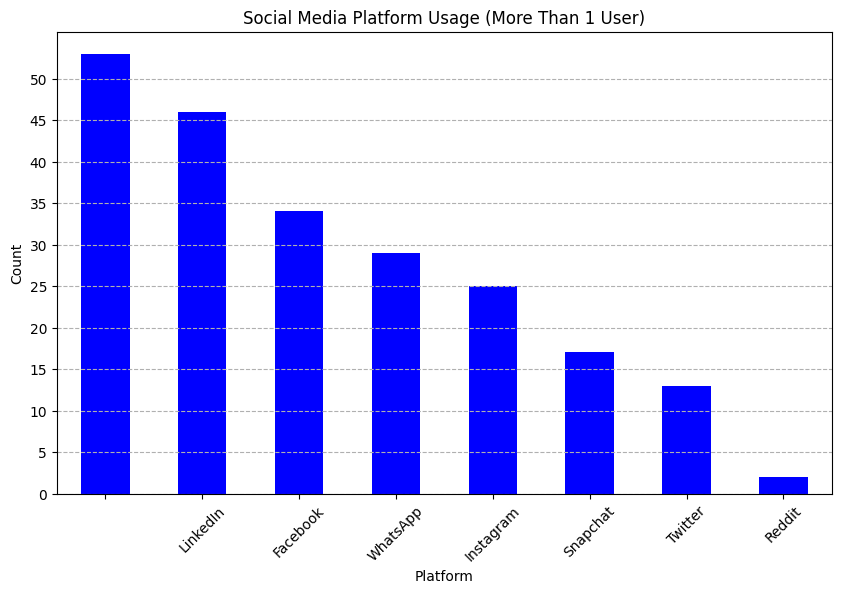

In [20]:
# Extract and explode the social media platforms to count each one individually
individual_platforms = df['Which social media platforms do you use?'].str.split(';').explode()

# Count the occurrences of each platform and filter out those with less than 2 users
individual_platform_counts = individual_platforms.value_counts()
filtered_platform_counts = individual_platform_counts[individual_platform_counts > 1]

# Plotting the filtered count of individual platforms
plt.figure(figsize=(10, 6))
filtered_platform_counts.plot(kind='bar', color='blue')
plt.title('Social Media Platform Usage (More Than 1 User)')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Adjust the y-axis to show ticks in multiples of 5
plt.yticks(range(0, max(filtered_platform_counts) + 1, 5))

# Show the plot
plt.show()


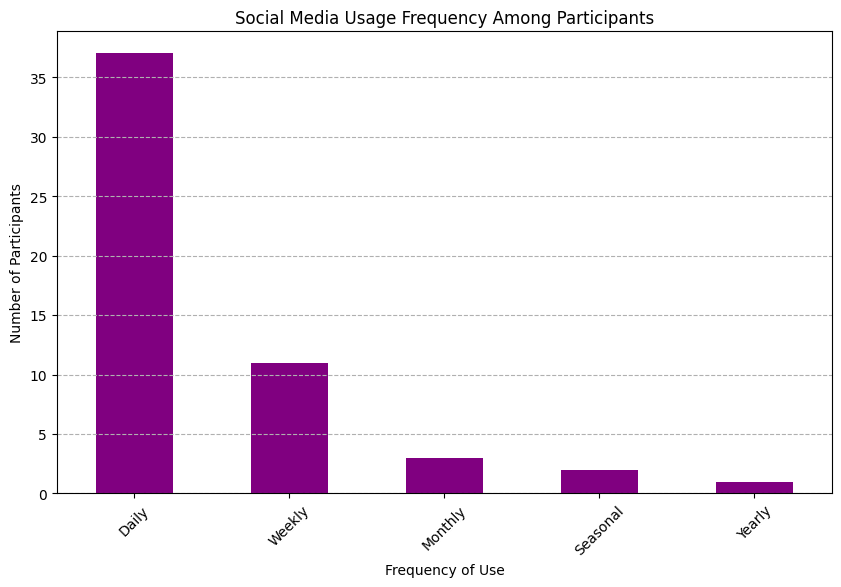

In [18]:
# Analyze the "How often do you use social media?" column for counts
social_media_use_counts = df['How often do you use social media? '].value_counts()

# Plotting the social media usage frequency
plt.figure(figsize=(10, 6))
social_media_use_counts.plot(kind='bar', color='purple')
plt.title('Social Media Usage Frequency Among Participants')
plt.xlabel('Frequency of Use')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Adjust the y-axis to show ticks in multiples of 5, with an adjustment for cases with lower max counts
max_count = max(social_media_use_counts)
plt.yticks(range(0, max_count + 1, 5 if max_count >= 5 else 1))

# Show the plot
plt.show()


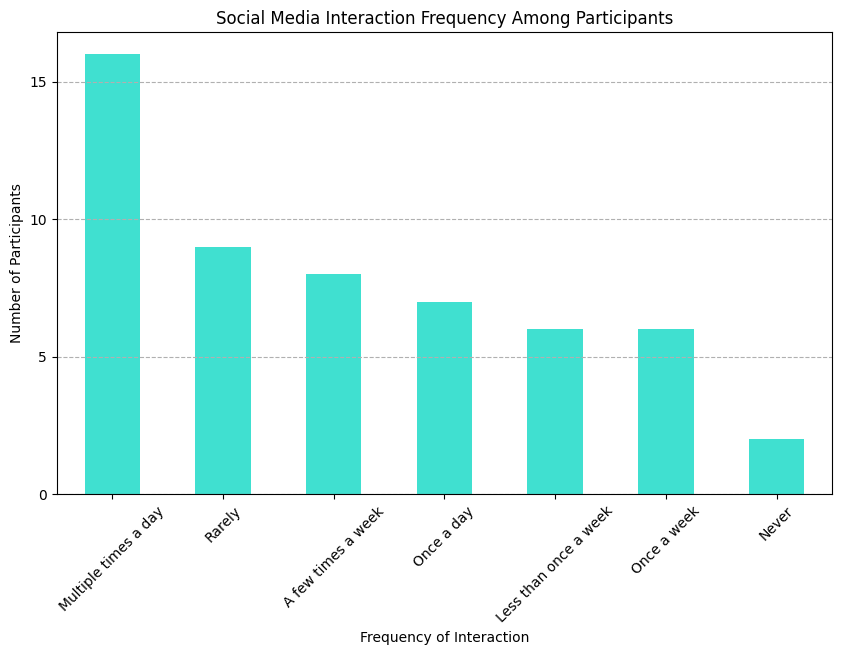

In [19]:
# Analyze the "How often do you interact when using social media (comment, like, react, repost, share, etc.)" column for counts
social_media_interaction_counts = df['How often do you interact when using social media (comment, like, react, repost, share, etc.)'].value_counts()

# Plotting the social media interaction frequency
plt.figure(figsize=(10, 6))
social_media_interaction_counts.plot(kind='bar', color='turquoise')
plt.title('Social Media Interaction Frequency Among Participants')
plt.xlabel('Frequency of Interaction')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

# Adjust the y-axis to show ticks in multiples of 5, with an adjustment for cases with lower max counts
max_count_interaction = max(social_media_interaction_counts)
plt.yticks(range(0, max_count_interaction + 1, 5 if max_count_interaction >= 5 else 1))

# Show the plot
plt.show()

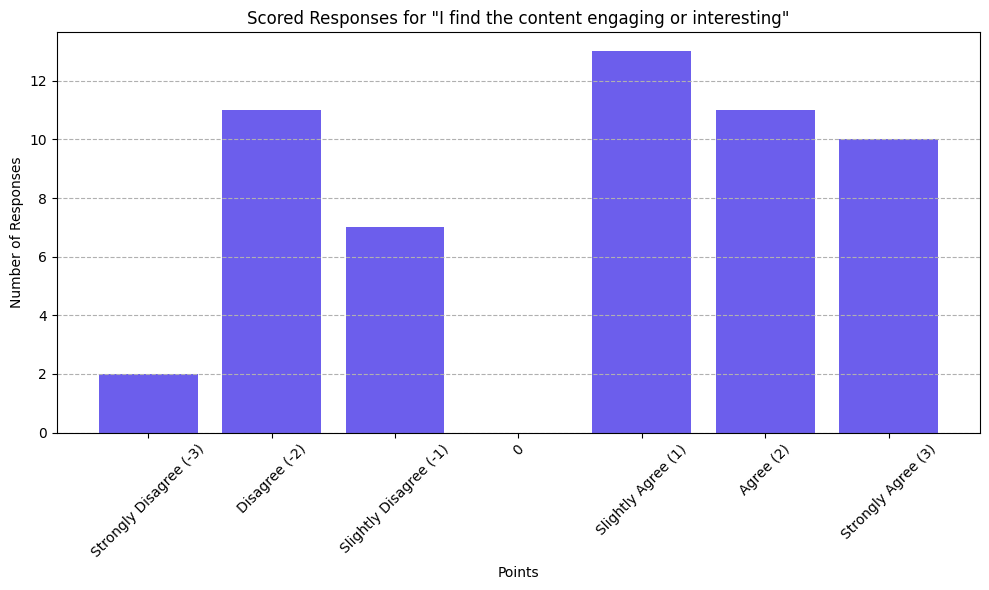

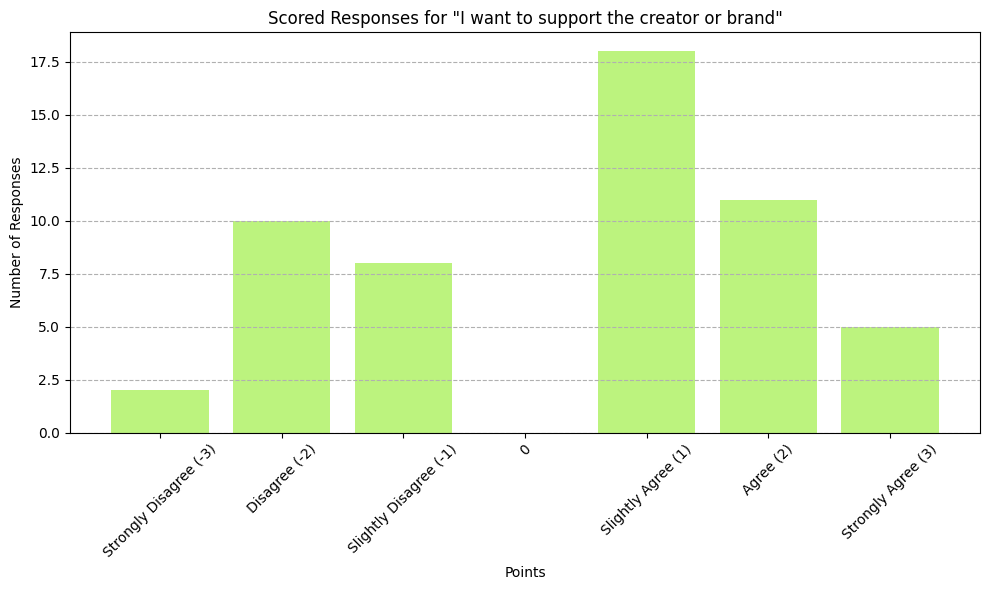

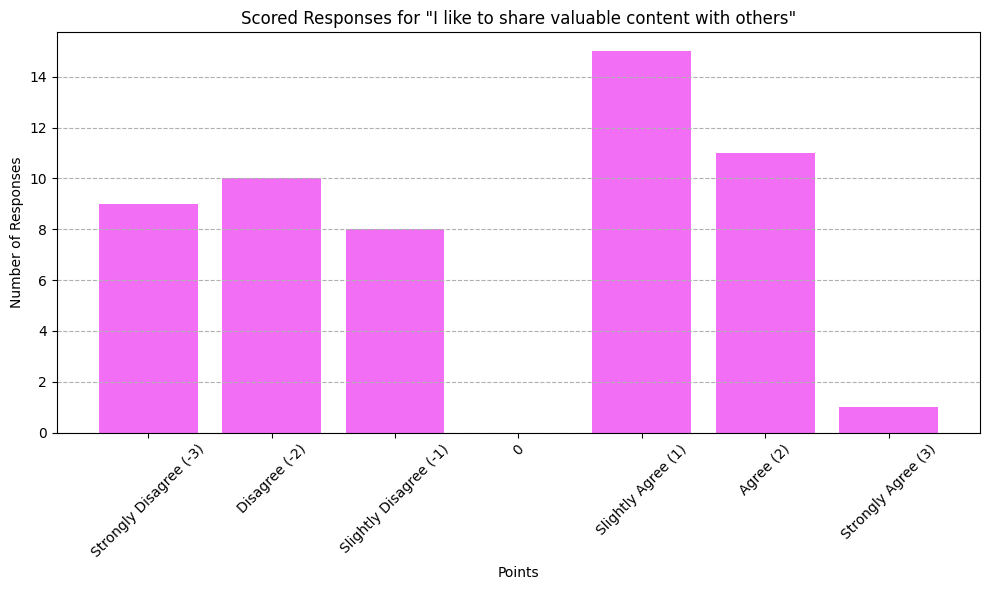

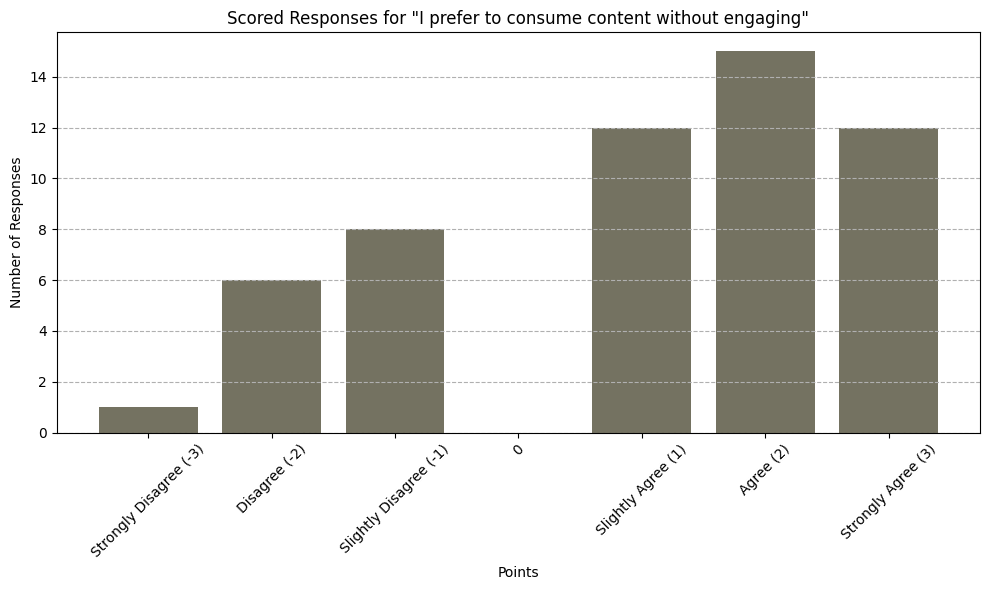

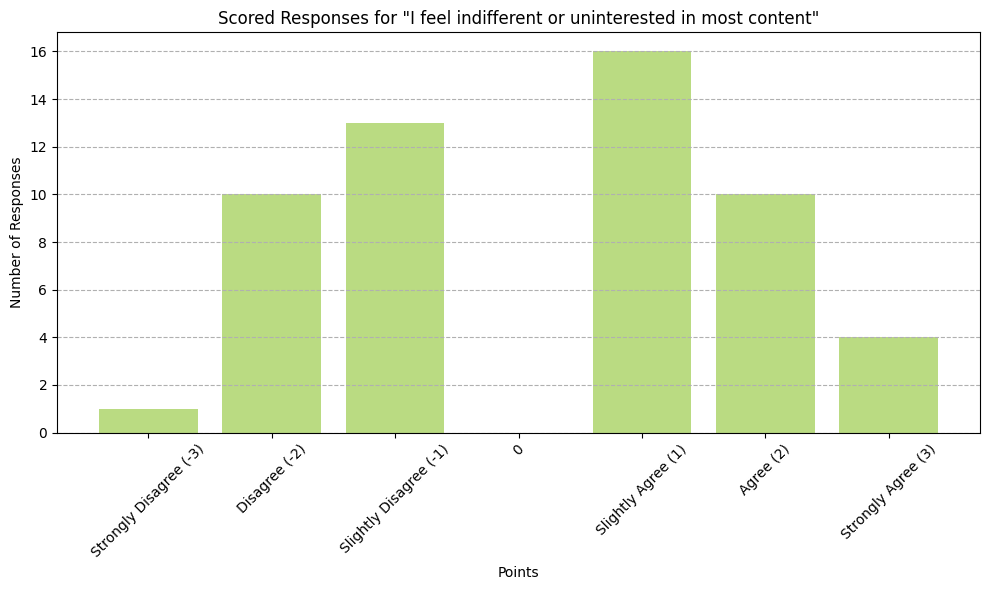

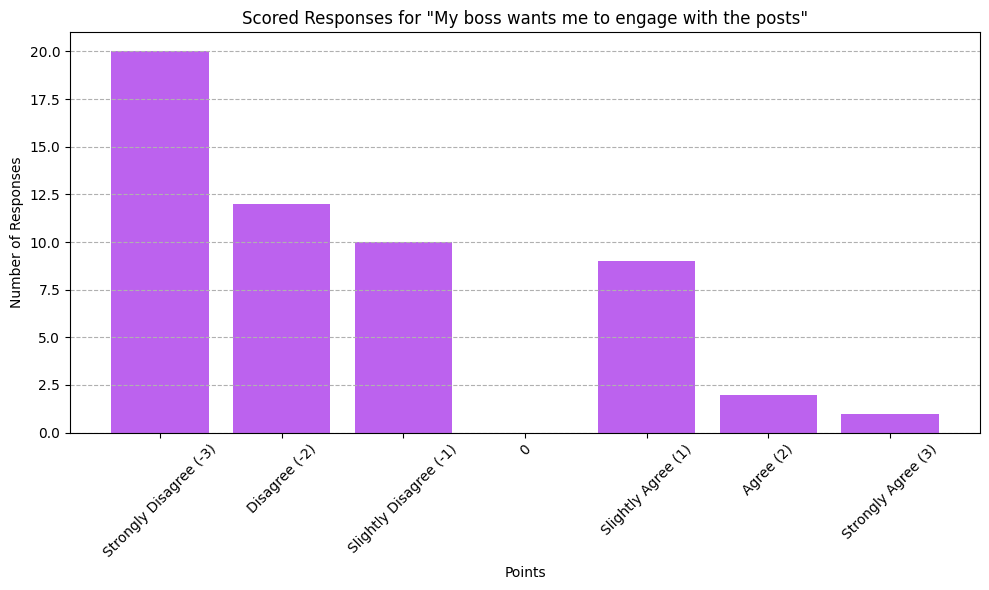

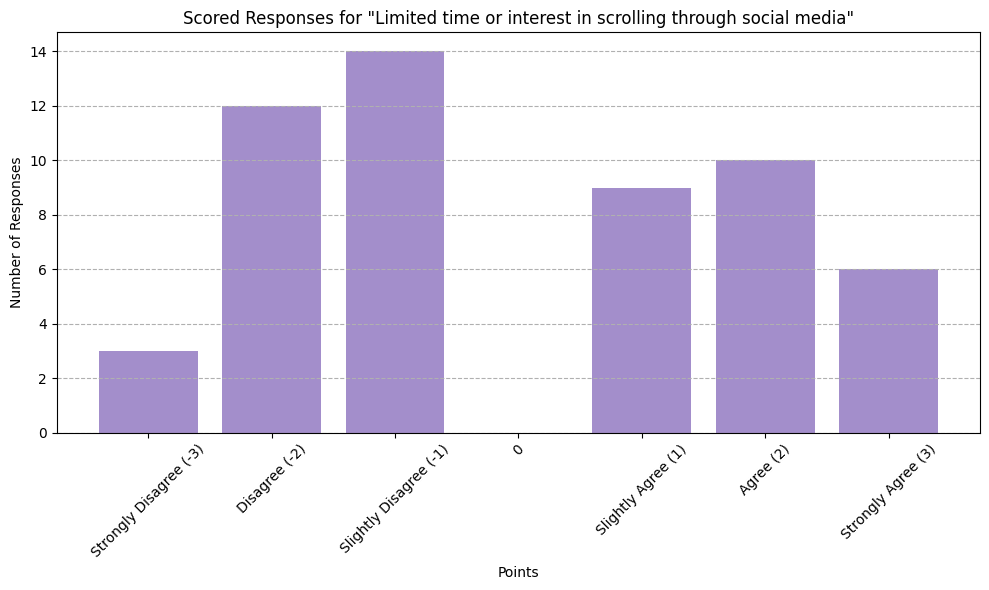

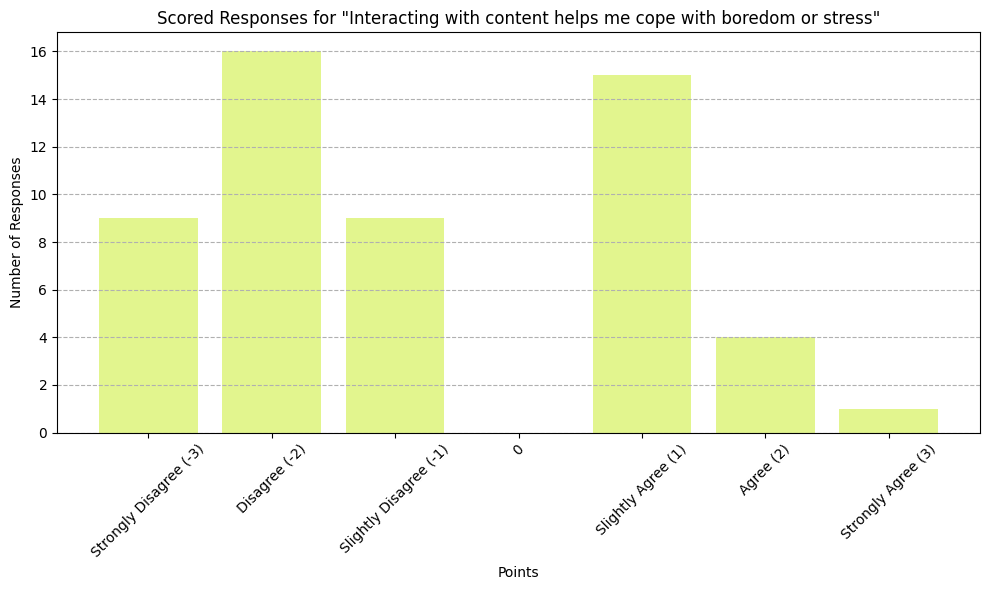

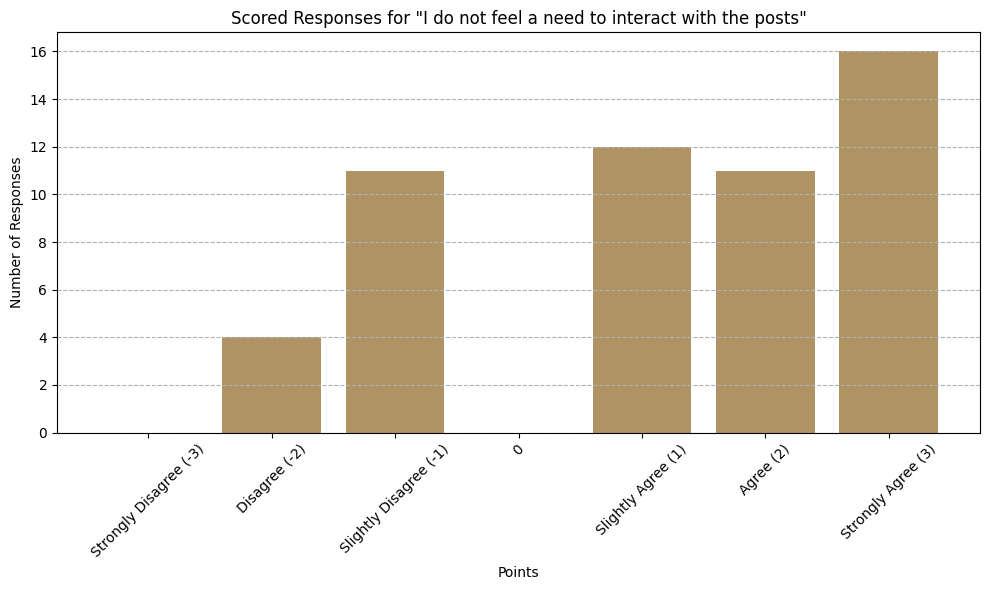

                                            Question  Total Points
8    I do not feel a need to interact with the posts            63
3       I prefer to consume content without engaging            55
0         I find the content engaging or interesting            30
1             I want to support the creator or brand            21
4  I feel indifferent or uninterested in most con...            12
6  Limited time or interest in scrolling through ...             0
2       I like to share valuable content with others           -15
7  Interacting with content helps me cope with bo...           -42
5          My boss wants me to engage with the posts           -78


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the survey data
df_new = pd.read_csv('Knowit communication survey 2(Sheet1).csv', encoding='ISO-8859-1')

# Define the mapping of agreement levels to points
points_mapping = {
    'strongly agree': 3,
    'agree': 2,
    'slightly agree': 1,
    'slightly disagree': -1,
    'disagree': -2,
    'strongly disagree': -3
}

# List of questions to be processed and visualized
questions_to_visualize = [
    "Rate these categories on importance of why you interact or not with social media posts?.I find the content engaging or interesting",
    "Rate these categories on importance of why you interact or not with social media posts?.I want to support the creator or brand",
    "Rate these categories on importance of why you interact or not with social media posts?.I like to share valuable content with others",
    "Rate these categories on importance of why you interact or not with social media posts?.I prefer to consume content without engaging",
    "Rate these categories on importance of why you interact or not with social media posts?.I feel indifferent or uninterested in most content",
    "Rate these categories on importance of why you interact or not with social media posts?.My boss wants me to engage with the posts",
    "Rate these categories on importance of why you interact or not with social media posts?.Limited time or interest in scrolling through social media",
    "Rate these categories on importance of why you interact or not with social media posts?.Interacting with content helps me cope with boredom or stress",
    "Rate these categories on importance of why you interact or not with social media posts?.I do not feel a need to interact with the posts"
]

# Removing the common prefix for readability
common_prefix = "Rate these categories on importance of why you interact or not with social media posts?."

# Initialize a dictionary to hold the total points for each question
total_points_per_question = {}

# Loop through each question, process responses, calculate total points, and visualize
for question in questions_to_visualize:
    question_clean = question.replace(common_prefix, "").replace("_", " ").capitalize()
    responses_normalized = df_new[question].str.lower()
    responses_points = responses_normalized.map(points_mapping)
    total_points = responses_points.sum()
    
    # Storing the total points for each question
    total_points_per_question[question_clean] = total_points

    # Visualization of responses for each question
    score_categories = np.arange(-3, 4)  # Score categories from -3 to 3
    score_counts = [responses_points.value_counts().get(i, 0) for i in score_categories]

    plt.figure(figsize=(10, 6))
    plt.bar(score_categories, score_counts, color=np.random.rand(3,), alpha=0.7, align='center')
    plt.title(f'Scored Responses for "{question_clean}"')
    plt.xlabel('Points')
    plt.ylabel('Number of Responses')
    plt.xticks(ticks=score_categories, labels=['Strongly Disagree (-3)', 'Disagree (-2)', 'Slightly Disagree (-1)', '0', 'Slightly Agree (1)', 'Agree (2)', 'Strongly Agree (3)'], rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()
    plt.show()

# Convert the total points dictionary to a DataFrame for sorting and better visualization
total_points_df = pd.DataFrame(list(total_points_per_question.items()), columns=['Question', 'Total Points'])

# Sort the DataFrame based on 'Total Points' from most to least points
total_points_df_sorted = total_points_df.sort_values(by='Total Points', ascending=False)

print(total_points_df_sorted)


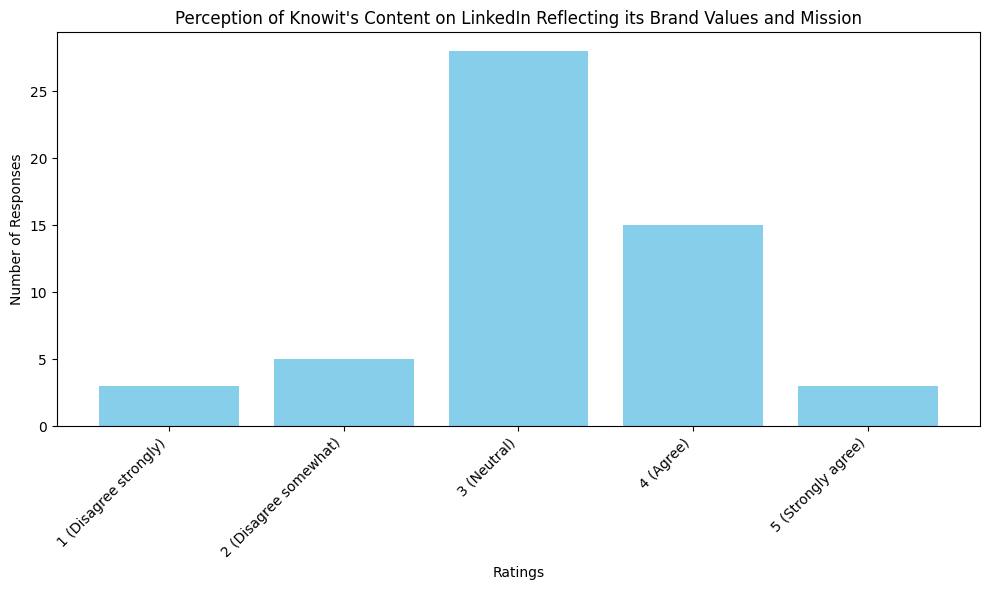

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file using an encoding to handle special characters
file_path = 'Knowit communication survey 2(Sheet1).csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Extract responses for the specific question about Knowit's LinkedIn content
column_of_interest = "How well do you think Knowit's current content on LinkedIn reflects its brand values and mission? Can you provide examples? "
response_counts = data[column_of_interest].value_counts()

# Preparing data for plotting
ratings = ['1 (Disagree strongly)', '2 (Disagree somewhat)', '3 (Neutral)', '4 (Agree)', '5 (Strongly agree)']
counts = [response_counts.get(1, 0), response_counts.get(2, 0), response_counts.get(3, 0), response_counts.get(4, 0), response_counts.get(5, 0)]

# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ratings, counts, color='skyblue')
plt.title("Perception of Knowit's Content on LinkedIn Reflecting its Brand Values and Mission")
plt.xlabel('Ratings')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the graph
plt.show()


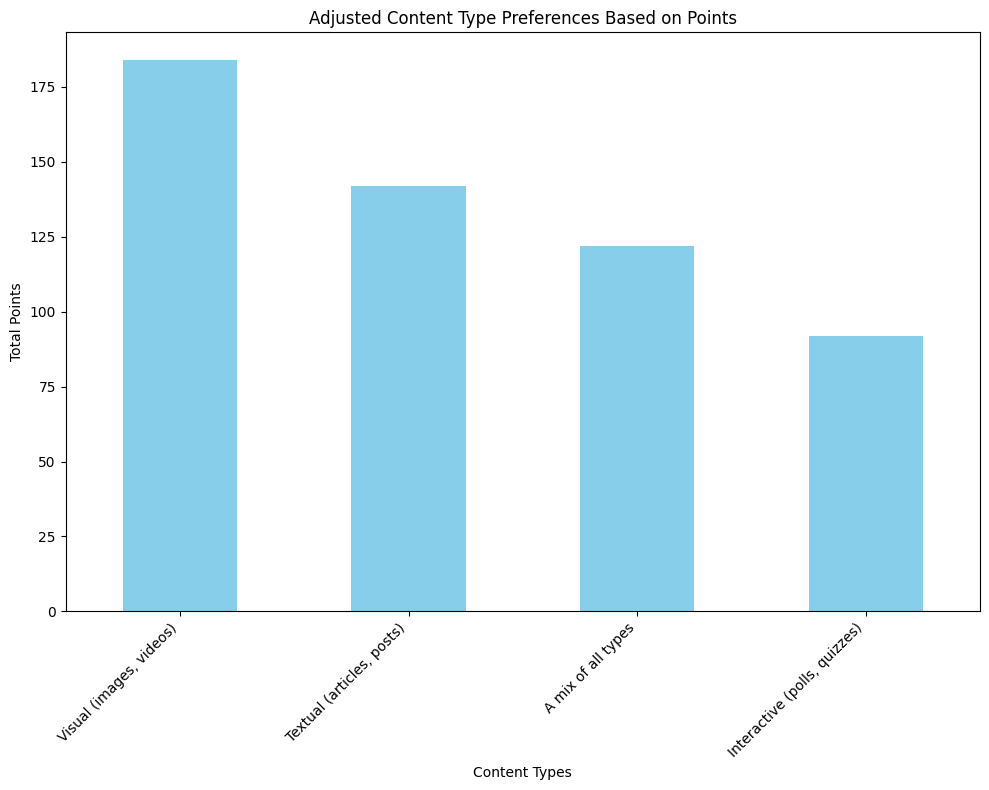

In [11]:
file_path = 'Knowit communication survey 2(Sheet1).csv'  # Update this to your actual file path
survey_data = pd.read_csv(file_path, encoding='ISO-8859-1')  # Adjust encoding if needed

# Extract the specific column with content type preferences
content_preferences = survey_data['Rank these content types that you prefer'].str.split(';', expand=True)

# Define the point mapping for each rank
points_mapping = {0: 4, 1: 3, 2: 2, 3: 1}

# Initialize a dictionary to hold the accumulated points for each content type
content_points_corrected = {}

# Iterate over each row and apply the point system based on the content type's position
for _, row in content_preferences.iterrows():
    for idx, content_type in enumerate(row.dropna()):
        if idx in points_mapping:  # Ensure the index is within the bounds of the points mapping
            content_type = content_type.strip()
            if content_type in content_points_corrected:
                content_points_corrected[content_type] += points_mapping[idx]
            else:
                content_points_corrected[content_type] = points_mapping[idx]

# Convert the dictionary to a series and sort it by values
sorted_content_points = pd.Series(content_points_corrected).sort_values(ascending=False)

# Plotting the results
plt.figure(figsize=(10, 8))
sorted_content_points.plot(kind='bar', color='skyblue')
plt.title('Adjusted Content Type Preferences Based on Points')
plt.xlabel('Content Types')
plt.ylabel('Total Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

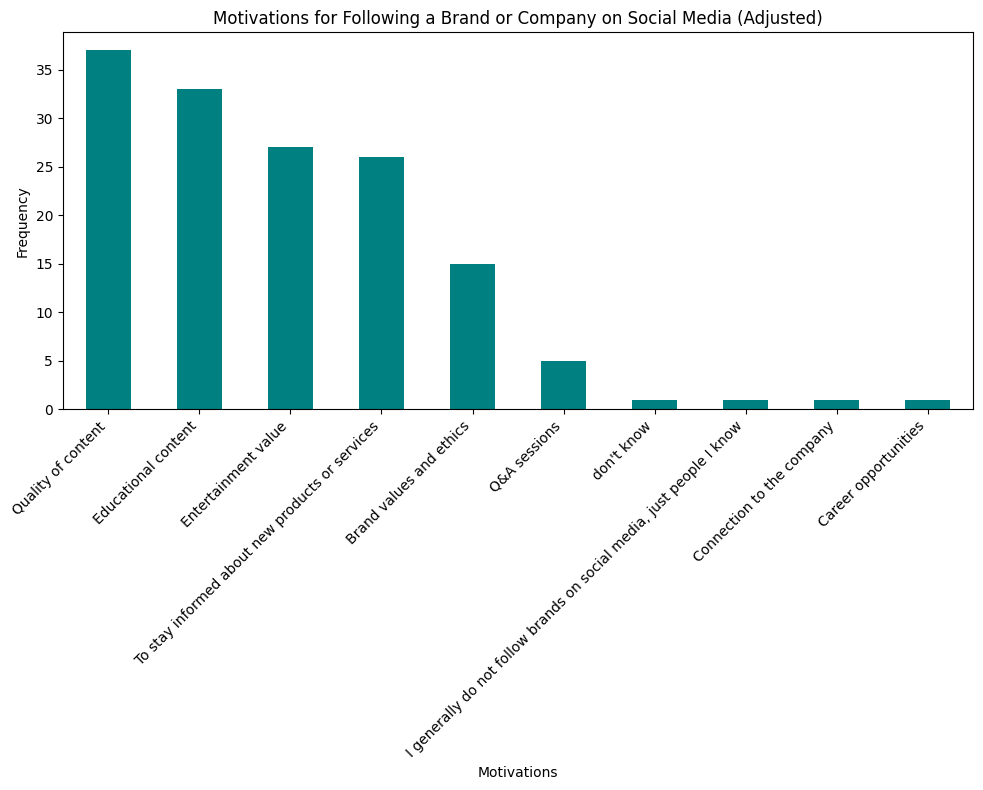

In [15]:
# Load the data
file_path = 'Knowit communication survey 2(Sheet1).csv'  # Update this to your actual file path
survey_data = pd.read_csv(file_path, encoding='ISO-8859-1')  # Adjust encoding if needed

# Extract the specific column with motivations for following a brand or company
motivations_data = survey_data['What motivates you to follow a brand or company on social media?'].str.split(';', expand=True)

# Flatten the data and count the occurrences of each motivation
motivation_counts = motivations_data.stack().value_counts()

# Removing the first (most frequent) value from the motivation counts
adjusted_motivation_counts = motivation_counts.iloc[1:]

# Replotting the data without the first value
plt.figure(figsize=(10, 8))
adjusted_motivation_counts.plot(kind='bar', color='teal')
plt.title('Motivations for Following a Brand or Company on Social Media (Adjusted)')
plt.xlabel('Motivations')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

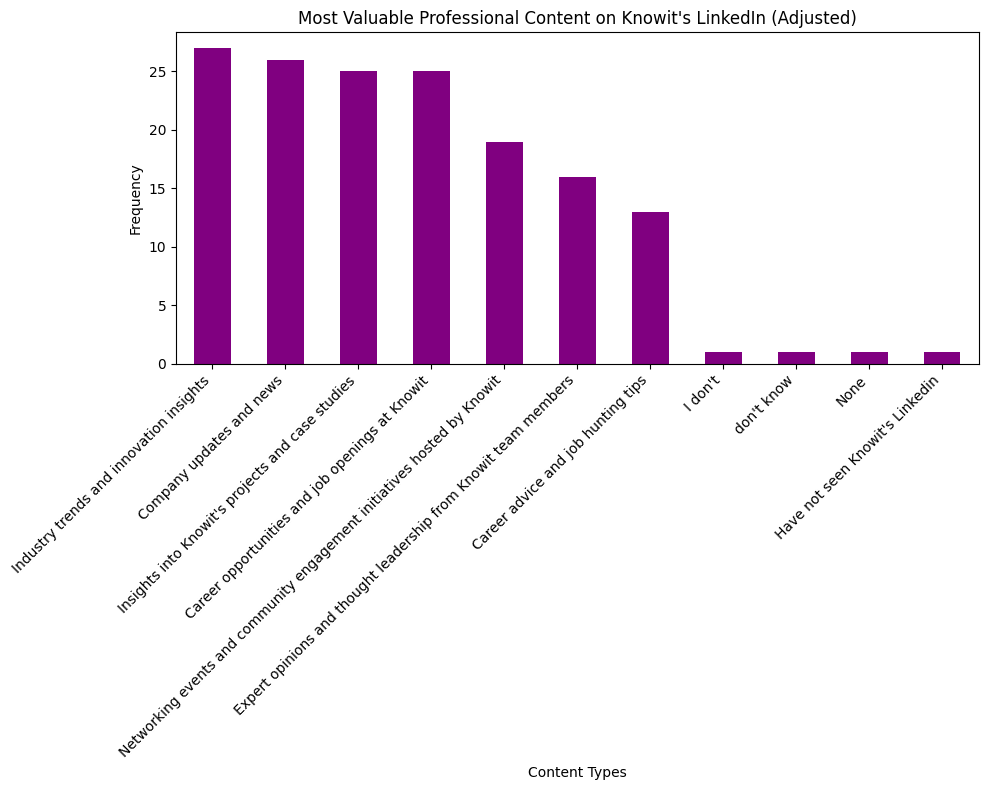

In [17]:
# Load the data
file_path = 'Knowit communication survey 2(Sheet1).csv'  # Update this to your actual file path
survey_data = pd.read_csv(file_path, encoding='ISO-8859-1')  # Adjust encoding if needed

# Extract the specific column about professional content value on LinkedIn
professional_content_data = survey_data["What type of professional content do you find most valuable on Knowit's LinkedIn (e.g., industry news, career advice, company updates)?"].str.split(';', expand=True)

# Flatten the data and count the occurrences of each content type
professional_content_counts = professional_content_data.stack().value_counts()

# Removing the first (most frequent) value from the professional content counts
adjusted_content_counts = professional_content_counts.iloc[1:]

# Replotting the data without the first value
plt.figure(figsize=(10, 8))
adjusted_content_counts.plot(kind='bar', color='purple')
plt.title('Most Valuable Professional Content on Knowit\'s LinkedIn (Adjusted)')
plt.xlabel('Content Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [28]:
file_path = 'Knowit communication survey 2(Sheet1).csv'  # Update this to your actual file path
survey_data = pd.read_csv(file_path, encoding='ISO-8859-1')  # Adjust encoding if needed

# Extracting the responses for the question about ideal interactions on LinkedIn
responses = survey_data['Describe an ideal interaction on LinkedIn. What kind of content leads to meaningful professional connections for you?'].dropna().unique()

# Printing each unique response
for i, response in enumerate(responses, start=1):
    print(f"{i}. {response}")

KeyError: 'Describe an ideal interaction on LinkedIn. What kind of content leads to meaningful professional connections for you?'